Graduate Supplement

Task a

In [36]:
import numpy as np

In [37]:
reduced_h = 1     # in atomic units
m = 1             # in atomic units
L = 1.0           # in atomic units a0 (Bohr radius)

grid_points = np.linspace(-L/2, L/2, 2000)


In [38]:
print(len(grid_points))
print(grid_points[-2]-grid_points[-1])

2000
-0.0005002501250626068


In [39]:
def construct_laplacian(size, delta_x):
    identity_I = np.identity(size)
    off_diagonal_values = np.ones(size - 1)
    off_diagonal_I = np.diag(off_diagonal_values, k=-1) + np.diag(off_diagonal_values, k=1)

    laplacian = 1/(delta_x**2)*(-2*identity_I + off_diagonal_I)

    return laplacian

In [40]:
size = len(grid_points)

delta_x = grid_points[1] - grid_points[0]

laplacian_matrix = construct_laplacian(size, delta_x)

H_matrix = -(reduced_h**2)/(2*m)*laplacian_matrix

eigenvalues, eigenvectors = np.linalg.eig(H_matrix)

sorted_indexes = np.argsort(eigenvalues)

sorted_eigenvectors = eigenvectors[:, sorted_indexes][:, :5]






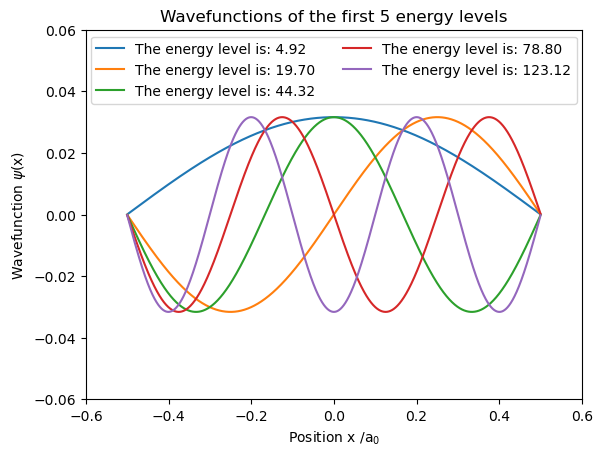

In [58]:
import matplotlib.pyplot as plt

x = grid_points
y = sorted_eigenvectors

energy_levels = eigenvalues[sorted_indexes][:5]

plt.plot(figsize=(15, 10))

for i in range(5):
    plt.plot(x, y[:, i], label=f"The energy level is: {energy_levels[i]:.2f}")


plt.xlim(-0.6, 0.6)
plt.ylim(-0.06, 0.06)
plt.xlabel(r"Position x /a$_0$")
plt.ylabel(r"Wavefunction $\psi$(x)")
plt.title("Wavefunctions of the first 5 energy levels")
plt.legend(loc="upper center", ncol=2)
plt.show()